# Steam Demand Profile at the University of Illinois

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(12,9)
# plt.rcParams['font.size'] = '16'
plt.style.use('ggplot')

import matplotlib as mpl
# mpl.use("pgf")
# plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['pgf.rcfonts'] = False
plt.rcParams['figure.edgecolor'] = 'k'
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

from trends import seasonal_trend, plot_seasonal
from trends import season_colors as seasons

In [2]:
for i in [15,16,17,18,19]:
    if i == 15:
        df = pd.read_csv(f'../steamfy{i}.csv', index_col='Date and Time', parse_dates=True)
    else:
        df_new = pd.read_csv(f'../steamfy{i}.csv', index_col='Date and Time', parse_dates=True)
        df = pd.concat([df, df_new], axis=0)

In [3]:
df.rename(columns={'Date and Time':'time'}, inplace=True)

We use the equation

$$P_{th} = \dot{Q} = \dot{m}c_p\Delta T$$

This equation gives the thermal power required to heat a certain amount of water to a certain temperature. 

At 120$^\circ$C the $c_p$ of water is 4243.5 [J/kg K]

$\Delta T$ is 179$^\circ$C

Alternatively, we can use the change in enthalpy to calculate the power requirement. According to the master plan the inlet enthalpy is 196 BTU/lb and the outlet enthalpy after superheating is 1368 BTU/lb. 

We can convert to $P_{th}$ by 

$$P_{th} = \dot{m}\Delta h$$

Using the typical history of steam mass flow rates

In [4]:
h_in = 196 # BTU/lb
h_out = 1368 # BTU/lb
btu_to_kwh = 0.29307107


# times 0.29307107 to convert from BTU/hr to kilowatts
to_kwth = lambda mdot: (mdot*(h_out-h_in))*btu_to_kwh

In [5]:
df['kw'] = df['Value (KLBS/HR)'].apply(to_kwth)
# df['kw'].to_csv('../uiuc_steam_data.csv')

In [9]:
df.index[-1]

TypeError: 'Timestamp' object is not subscriptable

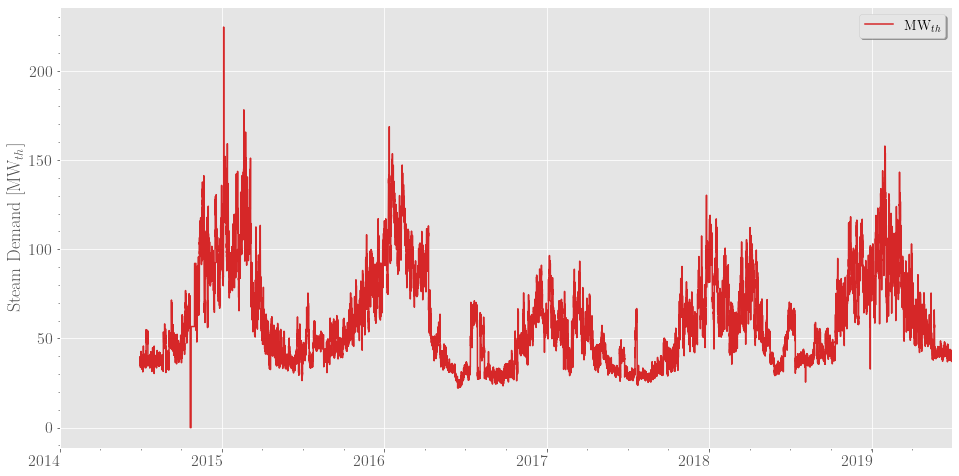

In [20]:
ax= (df.kw/1000).plot(figsize=(16,9), color='tab:red')
# ax.set_leve
plt.ylabel(r'Steam Demand [MW$_{th}$]', fontsize=18)
plt.xlabel(r'', fontsize=18)
plt.xticks(fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.legend(['MW$_{th}$'],fontsize=14, fancybox=True, shadow=True)
plt.minorticks_on()
plt.xlim(df.index[0].strftime('%Y'), df.index[-1])
# plt.xticks.set_ticklabels(dates.strftime('%Y'))
# ax.xaxis.set_ticklabels(df.index.strftime('%Y'))
# plt.savefig('../../thesis/figures/uiuc_steam.pgf')
plt.show()

In [17]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
distribution_df = seasonal_trend(df, column='kw',feature='dist')
distribution_df

,spring,spring_dist,summer,summer_dist,fall,fall_dist,winter,winter_dist
0,58712.504500,0.010427,38270.226063,0.010163,53157.647719,0.010307,84891.734542,0.010361
1,57950.115272,0.010291,37776.503142,0.010032,52027.017866,0.010088,83655.292552,0.010210
2,57720.787982,0.010251,37559.243896,0.009974,51611.811201,0.010007,83285.669900,0.010165
3,58031.723557,0.010306,37605.139533,0.009986,51523.577126,0.009990,83383.034274,0.010177
4,58552.477527,0.010398,37696.002062,0.010010,51748.528318,0.010034,83772.087053,0.010224
5,59282.143307,0.010528,37944.205907,0.010076,52346.413190,0.010150,84417.722968,0.010303
6,60621.115173,0.010766,38331.117190,0.010179,53477.339263,0.010369,86263.711838,0.010528
7,63454.627414,0.011269,39406.152220,0.010464,56901.909455,0.011033,90672.370491,0.011066
8,63786.910115,0.011328,40159.298462,0.010664,58381.422381,0.011320,92538.734170,0.011294
9,62602.626814,0.011118,40578.997852,0.010776,57253.324885,0.011101,90596.838755,0.011057


In [9]:
fig, ax = plot_seasonal(distribution_df, 
                        feature='dist', 
                        title='Seasonal Hourly Steam Demand',
                        xlabel='Hour',
                        ylabel='Demand Specific Distribution [-]')
ax.minorticks_on()
plt.legend(fancybox=True, shadow=True, fontsize=14)
plt.tight_layout()
plt.savefig('../../thesis/figures/uiuc_steam_seasonal.pgf')

In [10]:
stm_years = df.groupby(df.index.year)
years = np.arange(2015,2020,1)

steam_demand = np.array([stm_years.get_group(y).kw.sum() for y in years]).mean()
steam_demand/1e6  # GWh(th)

465.15998065199295

In [11]:
colors = {'spring':'tab:green',
         'summer':'tab:red',
         'fall':'tab:orange',
         'winter':'tab:blue'}
fig, axes = plt.subplots(1,2,figsize=(18,9),gridspec_kw={'width_ratios': [3, 1]}, sharey=True)
ax2 = axes[1].twinx()
peak = max(df.kw/1000)
# fig.figsize=(12,9)
for season in seasons:
    cf_key = season+"_dist"
    total = distribution_df[season].sum()
#     axes[1].plot(range(24), distribution_df[season]/(4*total)*1000, )
    ax2.plot(range(24), distribution_df[cf_key],label=season.capitalize(),color=colors[season], marker='o')
axes[1].set_xlabel('Hour',fontsize=16)
axes[1].set_title("Seasonal Hourly Average", fontsize=21)
axes[0].set_title("Hourly Campus Steam Demand at UIUC", fontsize=21)
# axes[1].legend(fontsize=14, fancybox=True, shadow=True)
ax2.legend(fontsize=14, fancybox=True, shadow=True)
axes[0].set_ylabel('Power [MW$_{th}$]',fontsize=20)
ax2.set_ylabel('Demand Specific Distribution [-]',fontsize=20)
axes[1].grid(which='major')
# (df[df.index.year==2018].kw/1000).plot(ax=axes[0], color='tab:blue', alpha=1)
(df.kw/1000).plot(ax=axes[0], color='tab:blue', alpha=1)
axes[0].set_xlabel('Date', fontsize=20)

axes[0].set_ylim(20,180)
# ax2.set_ylim(0,100)
ax2.set_xlim(0,24)
# axes[1].set_ylim(0,peak)
axes[1].set_xlim(0,24)
axes[1].minorticks_on()
# axes[0].minorticks_on()
axes[1].grid(which='minor', linestyle='--')
axes[0].grid(which='minor', linestyle='--')
ax2.grid(which='major', linestyle='-', color='w')
axes[0].tick_params(axis='both',labelsize=14)
axes[1].tick_params(axis='both',labelsize=14)
ax2.tick_params(axis='both',labelsize=14)
plt.tight_layout()
plt.savefig('../../thesis/figures/steam_timeslice.pgf')
plt.show()

<ipython-input-11-5c71ad97a3a5>:41: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()
